(10, 100)
(10, 100)


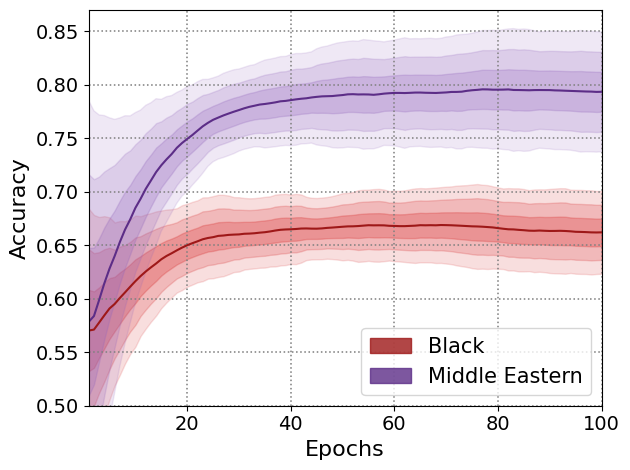

In [11]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory path and file extension
directory = "exp_548-557/acc_black/"
file_extension = "*.csv"

smoothing_factor = 0.9
x_min = 1
x_max = 100
x_label = "Epochs"
y_min = 0.5
y_max = 0.87
y_label = "Accuracy"
legend_pos = "lower right" #upper lower

text_size = 16
legend_size = 15
tick_size = 14
line_width_plot = 1.5



# List all CSV files in the directory
csv_files = glob.glob(directory + file_extension)

# Initialize an empty list to store the data from each file
data = []

# Load data from each CSV file
for csv_file in csv_files:
    df = pd.read_csv(csv_file, header=None)
    column_data = df.iloc[:, 2].values  # Extract data from the third column
    data.append(column_data)

# Convert the data to a NumPy array
data = np.array(data)
# Calculate the mean and variance for each time step across the runs
# mean = np.mean(data, axis=0)  # Mean across runs
# variance = np.var(data, axis=0)  # Variance across runs
print(data.shape)

# Exponentially smooth the entire time series by a factor of 0.5

smoothed_data = np.zeros_like(data)

for i in range(len(data)):
    smoothed_data[i, 0] = data[i, 0]  # Set the first value as is

    for j in range(1,100):
        smoothed_data[i, j] = (1-smoothing_factor) * data[i, j] + smoothing_factor * smoothed_data[i, j-1]

# Calculate the mean and variance of the smoothed data
mean = np.mean(smoothed_data, axis=0)
variance = np.var(smoothed_data, axis=0)




# Create the visualization
fig, ax = plt.subplots()

# Plot the mean
ax.plot(np.arange(100)+1, mean, color='#9e1818') # 

# Plot the shaded area for variance
std = np.sqrt(variance)  # Standard deviation
ax.fill_between(np.arange(100)+1, mean - std, mean + std, color='#d62728', alpha=0.25, label='Black')
ax.fill_between(np.arange(100)+1, mean - 2 * std, mean + 2 * std, color='#d62728', alpha=0.2)
ax.fill_between(np.arange(100)+1, mean - 3 * std, mean + 3 * std, color='#d62728', alpha=0.15) #red: #d62728 lightblue:#0362fc green:#2ca02c

# Set the x and y axis limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Axes labels and legend
plt.xlabel(x_label, fontsize=text_size)
plt.ylabel(y_label, fontsize=text_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# plt.legend(fontsize=legend_size, loc=legend_pos)

# plt.yticks(np.arange(0.6, 0.801, 0.025))


# Display the plot
plt.tight_layout()
plt.grid(color='gray', linestyle=':', linewidth=0.75*line_width_plot)





directory = "exp_548-557/acc_me/"


# List all CSV files in the directory
csv_files = glob.glob(directory + file_extension)

# Initialize an empty list to store the data from each file
data = []

# Load data from each CSV file
for csv_file in csv_files:
    df = pd.read_csv(csv_file, header=None)
    column_data = df.iloc[:, 2].values  # Extract data from the third column
    data.append(column_data)

# Convert the data to a NumPy array
data = np.array(data)
# Calculate the mean and variance for each time step across the runs
# mean = np.mean(data, axis=0)  # Mean across runs
# variance = np.var(data, axis=0)  # Variance across runs
print(data.shape)

# Exponentially smooth the entire time series by a factor of 0.5

smoothed_data = np.zeros_like(data)

for i in range(len(data)):
    smoothed_data[i, 0] = data[i, 0]  # Set the first value as is

    for j in range(1,100):
        smoothed_data[i, j] = (1-smoothing_factor) * data[i, j] + smoothing_factor * smoothed_data[i, j-1]

# Calculate the mean and variance of the smoothed data
mean = np.mean(smoothed_data, axis=0)
variance = np.var(smoothed_data, axis=0)




# Create the visualization
# fig, ax = plt.subplots()

# Plot the mean
ax.plot(np.arange(100)+1, mean, color='#5c2d87') # blue

# Plot the shaded area for variance
std = np.sqrt(variance)  # Standard deviation
ax.fill_between(np.arange(100)+1, mean - std, mean + std, color='#9467bd', alpha=0.25, label='Middle Eastern')
ax.fill_between(np.arange(100)+1, mean - 2 * std, mean + 2 * std, color='#9467bd', alpha=0.2)
ax.fill_between(np.arange(100)+1, mean - 3 * std, mean + 3 * std, color='#9467bd', alpha=0.15) #red: #d62728 lightblue:#0362fc

# Set the x and y axis limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Axes labels and legend
plt.xlabel(x_label, fontsize=text_size)
plt.ylabel(y_label, fontsize=text_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
legend = plt.legend(fontsize=legend_size, loc=legend_pos)
# Get the handles and labels from the legend
handles, labels = legend.legendHandles, legend.get_texts()

# Change the symbol for the second line in the legend
handles[0].set_alpha(0.8)
handles[0].set_color("#d62728")
handles[1].set_alpha(0.8)
handles[1].set_color("#9467bd")

handles[0].set_alpha(0.8)
handles[0].set_color("#9e1818")
handles[1].set_alpha(0.8)
handles[1].set_color("#5c2d87")


# plt.yticks(np.arange(0.6, 0.801, 0.025))


# Display the plot
# plt.tight_layout()
# plt.grid(color='gray', linestyle=':', linewidth=0.75*line_width_plot)





plt.savefig(os.path.join(directory, 'result.png'), dpi=150)
plt.show()
